<a href="https://colab.research.google.com/github/kashish00/Machine-Learning-Projects-TSF/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS- RETAIL**

● Perform EDA on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
  work to make more profit.

● What all business problems you can derive by exploring the data?

● Dataset: https://bit.ly/3i4rbWl


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/SampleSuperstore.csv")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#checking for null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values 


In [ ]:
#number of rows and columns respectively
df.shape 

(9994, 13)

In [ ]:
#count of each category under shipment mode
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
df.Country.nunique(dropna= True)

1

In [ ]:
#dropping the country column as there is only 1 unique value and thus wont affect the profit
df = df.drop(["Country"],axis=1)

In [ ]:
#count of each category under segment
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
#count of each category under postal code
df["Postal Code"].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
33458      1
95616      1
48307      1
61832      1
59102      1
Name: Postal Code, Length: 631, dtype: int64

In [ ]:
#dropping postal code column as it does not have much affect on the profits made
df = df.drop(["Postal Code"],axis=1)

In [ ]:
df.shape

(9994, 11)

In [ ]:
#checking for duplicate values
df.duplicated().sum()

50

In [ ]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Now, no duplicate values.

**Visualization through graphs**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


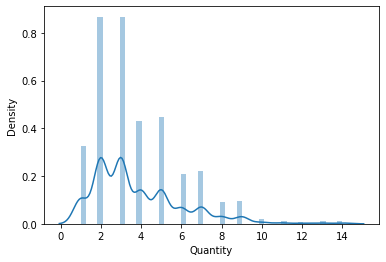

In [ ]:
sns.distplot(df["Quantity"])

We can see that for quantities 2 and 3 , the count is highest

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


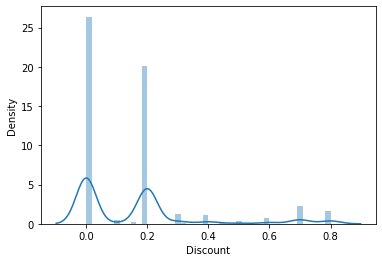

In [ ]:
sns.distplot(df["Discount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


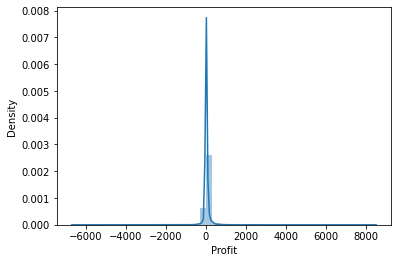

In [ ]:
sns.distplot(df["Profit"])

In [ ]:
#to find the correlation between them
cor = df.corr()

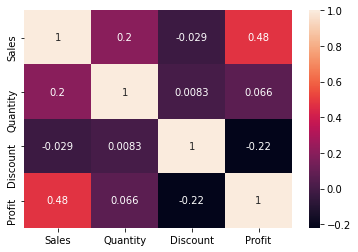

In [ ]:
sns.heatmap(cor, annot = True)

We can deduce from the above heatmap that Sales and Profit are correlated.

**State vs Profit**

In [ ]:
sales_profit = df.groupby("State")["Profit"].sum()
sales_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76215.9705
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12593.2976
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

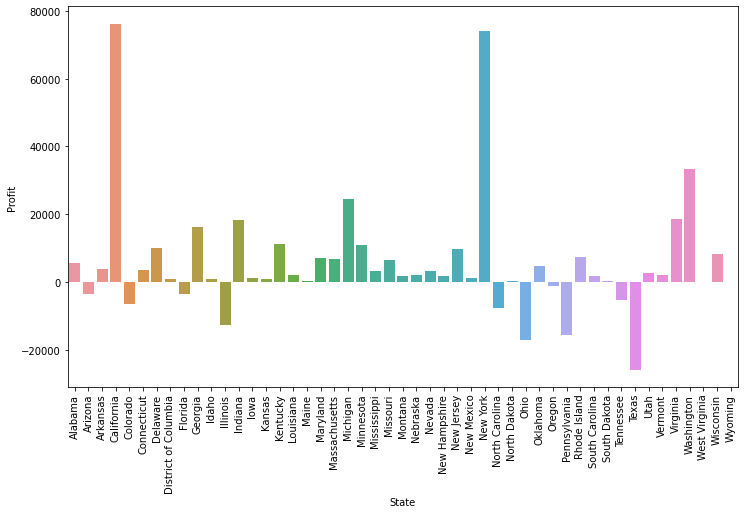

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(x = sales_profit.index, y=sales_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

We can infer from the above barplot that the states - California and New York are having the highest profit while Ohio, Pennsylvania and Texas are having the highest losses or least profits( negative ).

**Category vs Profit**

In [ ]:
sales_profit1 = df.groupby("Category")["Profit"].sum()
sales_profit1

Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64

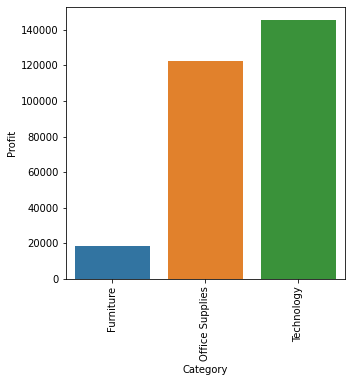

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = sales_profit1.index, y=sales_profit1.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

We can see that the profits are least for furniture.

**Region vs Count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


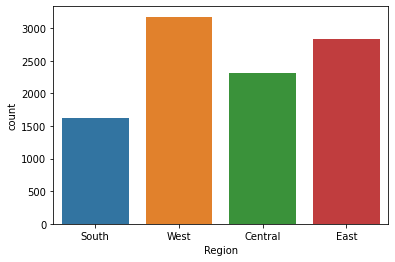

In [ ]:
sns.countplot("Region", data=df)

South contributes the least to sales

**Segment vs Count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


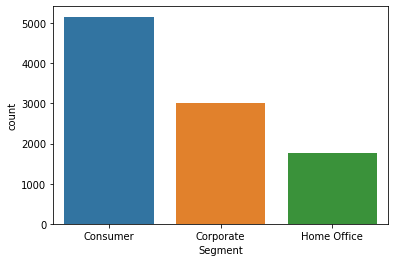

In [ ]:
sns.countplot("Segment", data=df)

Home office segment makes the least sales

**Sub-Category vs Region**

[]

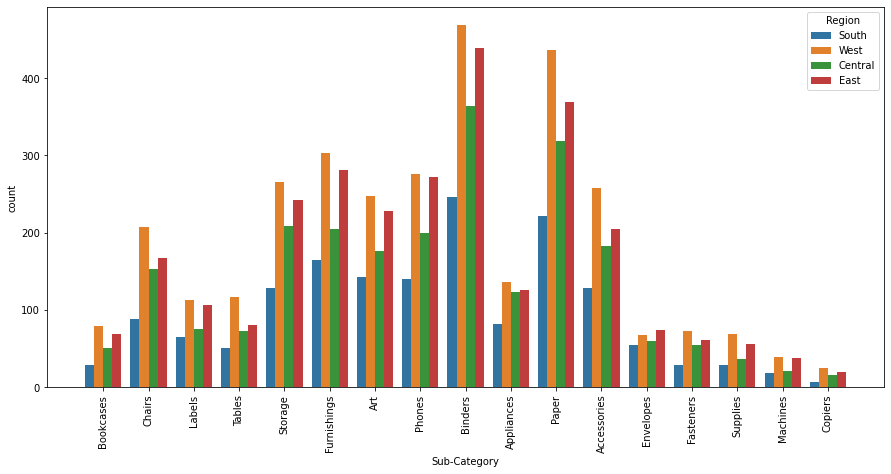

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

Copiers, Machines and Supplies are the least sold products overall . South accounts for the least sales in any of the sub-categories.

**Sales per State**

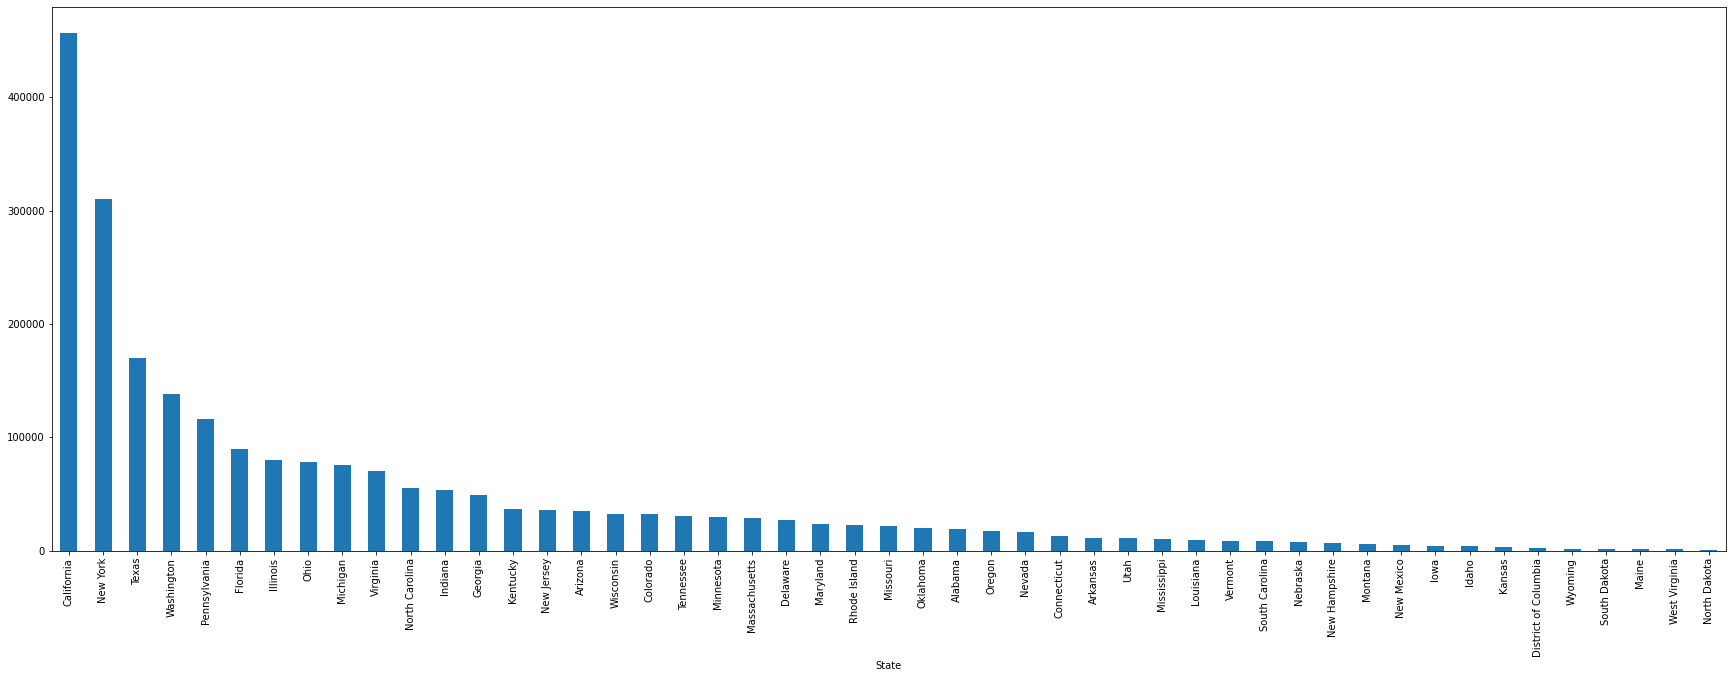

In [ ]:
sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
sales.plot.bar(figsize=(30,10))




1.   Highest sales- California, New York and Texas
2.   Least sales- North Dakota, West Virginia, Maine and South Dakota





**Profit and sales for sub-categories**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


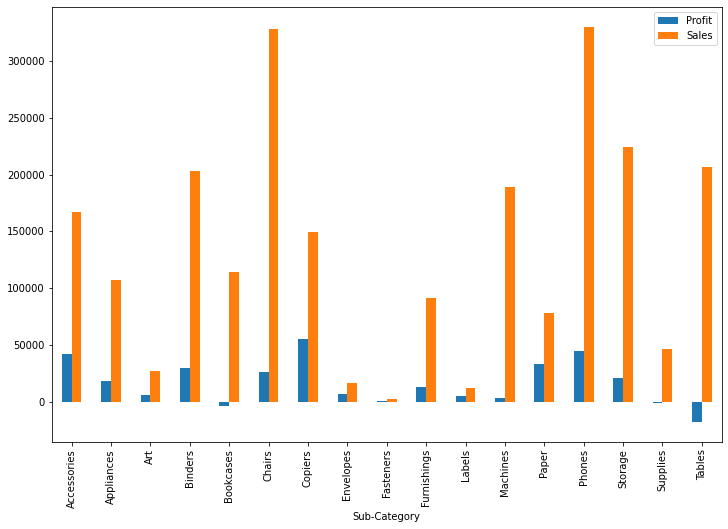

In [ ]:
category = df.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(12,8))

Conclusion :

1. We can deduce that our sales are higher as compared to our profit.
2. Tables, Bookcases and Supplies are responsible for maximum losses( in negative)

Weak Areas :
1. Though Copiers are the least sold products it makes most of the profit so, we must look for ways to improve the sales of the Copiers.
2. Tables should either be removed from the market or major changes should be made to tables in order to not incur losses in future.
3. We should try to improve our sales in North Dakota, South Dakota , West Virginia and Columbia using new techniques.
4. Our sales at Illinois, Ohio, Texas and Pennsylvania are making losses so we must concentrate on the loss making issues in this region.

So , in order to improve our sales and profit we must pay special attention to our losses and strengthen our weak areas as mentioned above.